In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py
%run ../Scripts/formulas.py
%run ../Scripts/plotVelocity.py

In [10]:
foldername_itr = []
list_to_sweep = [0, -0.01, -0.02, -0.05, 0.01, 0.05, 0.1, 0.5]
seeds = [0]
for num in list_to_sweep:
    for seed in seeds:
        foldername = f"../Data_temp_name10/beta{num}_seed{seed}"
        foldername_itr.append(foldername)

In [11]:
var_obs_mean = []
var_obs_var = []
var_calc_mean = []
var_calc_var = []

In [12]:
for foldername in foldername_itr[0:7]:
        with open(foldername + "/params.json") as json_file:
            params = json.load(json_file)
        with open(foldername + "/sim_params.json") as json_file:
            sim_params = json.load(json_file)

        init_list = []
        tree_index = 0
        tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
        while(os.path.isfile(tree_path)):
            # print("tree loaded:", tree_index)
            init_list.append(TreeNode.load_tree(tree_path))
            tree_index += 1
            tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
    
        var_obs, var_var_obs, var_calc_obs, var_var_calc = get_var_single(init_list, params, sim_params)

        var_obs_mean.append(var_obs)
        var_obs_var.append(np.sqrt(var_var_obs))
        var_calc_mean.append(var_calc_obs)
        var_calc_var.append(np.sqrt(var_var_calc))

        

/Users/zhizhang144515/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhizhang144515/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/zhizhang144515/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zhizhang144515/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/zhizhang144515/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/zhizhang144515

Text(0, 0.5, 'Numerical Variance')

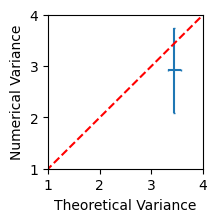

In [13]:
plt.figure(figsize = [2,2])
plt.errorbar(1.3*np.array(var_calc_mean), np.power(var_obs_mean, 1/6), xerr= var_calc_var,
            yerr = np.power(np.array(var_obs_var)/1000, 1/6), linestyle = "None", capsize = 1)
# plt.scatter(population_mean, velocity_mean)
# plt.scatter(v_Fisher_mean, v_obs_mean, color = "orange", linestyle = '--', label = "Fisher Velocity")

line_x = np.linspace(1e-2, 4, 100)
line_y = np.linspace(1e-2, 4, 100)

# Plot the diagonal line
plt.plot(line_x, line_y, color='red', linestyle='--', label = "Linear Fitness Velocity")
plt.xlabel("Theoretical Variance")
plt.xlim(1, 4)
plt.ylim(1, 4)
plt.ylabel("Numerical Variance")
# plt.legend()

/Users/zhizhang144515/Documents/CRISPR_Sim/Scripts/formulas.py:55: RuntimeWarning: invalid value encountered in power
  v = np.power(s, 1/3)*np.power(D, 2/3)*np.power(common_log, 1/3)
/Users/zhizhang144515/Documents/CRISPR_Sim/Scripts/formulas.py:94: RuntimeWarning: invalid value encountered in power
  uc = (1/4)*np.power(D/s, 1/3)*(np.power(common_log, 2/3))


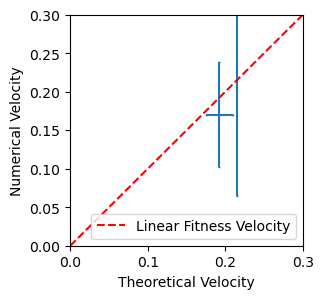

In [14]:
plot_velocity(foldername_itr, limits=[0.3, 0.3])

In [15]:
N_obs_mean = []
N_obs_var = []
N_calc_mean = []

In [16]:
for foldername in foldername_itr[0:8]:
        with open(foldername + "/params.json") as json_file:
            params = json.load(json_file)
        with open(foldername + "/sim_params.json") as json_file:
            sim_params = json.load(json_file)
        N_calc_obs = params["N0"]

        init_list = []
        tree_index = 0
        tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
        while(os.path.isfile(tree_path)):
            # print("tree loaded:", tree_index)
            init_list.append(TreeNode.load_tree(tree_path))
            tree_index += 1
            tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
    
        N_obs, N_var_obs= get_count_single(init_list, params, sim_params)

        N_obs_mean.append(N_obs)
        N_obs_var.append(np.sqrt(N_var_obs))
        N_calc_mean.append(N_calc_obs)

In [17]:
N_obs_mean

[nan, 1109.115, 2434.1493506493507, 1249.1812865497077, nan, nan, nan, nan]

In [18]:
N_calc_mean

[2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006]

In [19]:
N_obs_mean = [23589.62162162162,
 8991.23076923077,
 14136.045454545454,
 8363.037735849057,
 2977.7575757575758,
 2000.0,
 1500.050505050505,
 1287.46666666666664]

In [20]:
N_obs_var = [614.1619801899853,
 854.7503822615884,
 446.24539491107225,
 982.7342672795326,
 766.675943170612,
 97.51789133505083,
 462.7332227350794,
 411.11635549041566]

Text(0, 0.5, 'Numerical $N$')

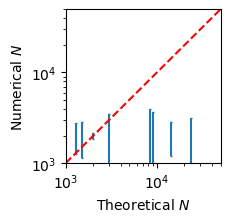

In [21]:
plt.figure(figsize = [2,2])
plt.errorbar(np.array(N_obs_mean), N_calc_mean,
            yerr = np.power(N_obs_var,1.1), linestyle = "None", capsize = 1)
# plt.scatter(population_mean, velocity_mean)
# plt.scatter(v_Fisher_mean, v_obs_mean, color = "orange", linestyle = '--', label = "Fisher Velocity")

line_x = np.linspace(1e3, 50000, 100)
line_y = np.linspace(1e3, 50000, 100)

# Plot the diagonal line
plt.plot(line_x, line_y, color='red', linestyle='--', label = "Linear Fitness Velocity")
plt.xlabel("Theoretical $N$")
plt.xlim(1e3, 2*25000)
plt.ylim(1e3, 2*25000)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Numerical $N$")